# Estimating $e = 2.71828...$

Continuing the trend of estimating well-known constants using the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method), here I wrote some code to approximate the value of [$e$, Euler's number](https://en.wikipedia.org/wiki/E_(mathematical_constant)). 


The commonly known infinite series expansion for $e$ is

$$
e = \sum^{\infty}_{n=0} \frac{1}{n!} = 1 + \frac{1}{1} + \frac{1}{1 \cdot 2} + \frac{1}{1 \cdot 2 \cdot 3} + ...
$$

We could approximate $e$ computationally using this representation, but but that does not involve any random sampling, which is at the heart of the Monte Carlo method. Instead, we are going to use a [not as well known method](https://www.jstor.org/stable/2685243?seq=1#page_scan_tab_contents) to estimate $e$. 


If you take the *sum* of independent [uniform random variables](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) (FYI, this sum is known as the [Irwin-Hall distribution](https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution)) until you reach greater than 1, the number of values summed is itself another random variable. Let's call this new random variable $ξ$ (Xi). Interestingly, the expected value of ξ is $e$. 


$$
U_0, U_1,... , U_n \stackrel{iid}{\sim} \text{Uniform}(0, 1)
$$

$$
ξ = \text{min}\{n | U_0 + U_1 + ... + U_n > 1 \}
$$

$$
\Rightarrow \mathbb{E}[ξ] = e
$$

[The proof of the expected value](https://gwr3n.github.io/notes/Rossi_stochastic_e_2020.pdf) uses the infinite series representation from above. 

Let's recreate this random variable, $ξ$, in Python, and estimate it's expected value.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Xi:


    def __init__(self):
        """
        A custom random variable class for ξ (Xi), described below. 
        
        Random Variable Description:
        ----------------------------
        U1, U2,...  iid~ Uniform(0, 1)

        Xn = U1 + U2 + ... + Un

        ξ ~ minimum value of n such that Xn > 1

        Used to show that E[ξ] = e (Euler's number)
        """
        
        # Initialize the random number generator with seed
        self.rng = np.random.default_rng(seed=42)

    def observe(self):
        """
        Instantiates the random variable once, returning the value. 
        """

        num_of_uniform_rv = 0
        sum_of_uniform_rv = 0

        # Loop until we get get enough uniform random variables to sum up to > 1
        while sum_of_uniform_rv <= 1:

            num_of_uniform_rv += 1
            sum_of_uniform_rv += self.rng.uniform()

        # The number of times the loop was executed is the random variable Xi
        return num_of_uniform_rv

    def estimate_expected_value(self, n=100):
        """
        Instantiates the random variable n times, returning the mean.
        """

        # Observe a list of random variables ~ Xi
        observed_values = [self.observe() for _ in range(n)]
        
        # Return the mean
        return sum(observed_values) / n


In [3]:
ξ = Xi()
ξ.observe()

2

It took two random numbers between 0 and 1 to sum up to more than 1

In [4]:
ξ.estimate_expected_value(n=1000000)

2.718614

We can estimate the expected value of the random variable using $n=1,000,000$ observations. The result is pretty close to the actual value of $e = 2.71828...$

Let's see how the value of the estimate changes as we use more and more observations...

In [5]:
x = list(range(1, 1000))
y = [ξ.estimate_expected_value(n=n) for n in x]

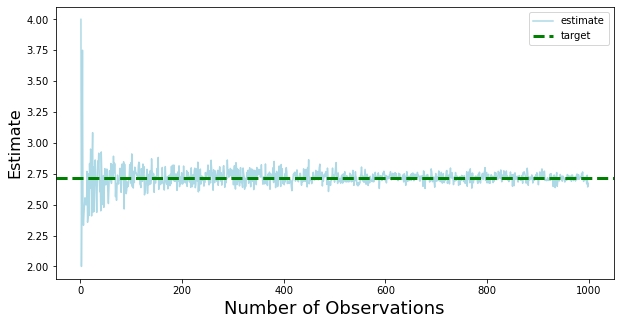

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='estimate', color='lightblue')
plt.axhline(y=np.e, color='r', linestyle='--', label='target', c='green', linewidth=3)
plt.legend()
plt.xlabel('Number of Observations', fontsize=18)
plt.ylabel('Estimate', fontsize=16);

The dotted green line is the target value, $e$. As the number of observations increases, the estimate of the expected value gets closer to the target.

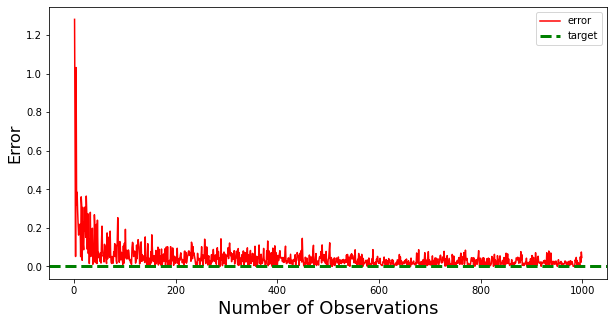

In [7]:
error = abs(np.array(y) - np.e)

plt.figure(figsize=(10, 5))
plt.plot(x, error, label='error', color='red')
plt.axhline(y=0, color='r', linestyle='--', label='target', c='green', linewidth=3)
plt.legend()
plt.xlabel('Number of Observations', fontsize=18)
plt.ylabel('Error', fontsize=16);


A similar chart showing the absolute error by the number of observations.

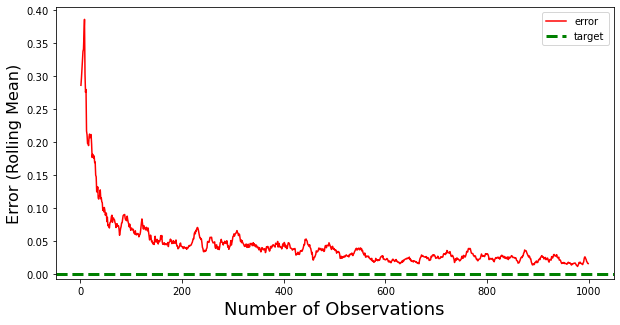

In [8]:
kernel_size = 15
kernel = np.ones(kernel_size) / kernel_size
rolling_mean_error = np.convolve(error, kernel, mode='same')

plt.figure(figsize=(10, 5))
plt.plot(x, rolling_mean_error, label='error', color='red')
plt.axhline(y=0, color='r', linestyle='--', label='target', c='green', linewidth=3)
plt.legend()
plt.xlabel('Number of Observations', fontsize=18)
plt.ylabel('Error (Rolling Mean)', fontsize=16);


Finally, another chart of the absolute error, but using a rolling mean to smooth the line. We can see an asymptotic decrease in the error as we use more and more observations.